<a href="https://colab.research.google.com/github/tarakantaacharya/Data_Analyst_Internship_Capx/blob/main/data_preprocessing_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data preprocessing

##Instructions:


### **Run the Code**

To run the data preprocessing code, follow these steps:

1. **Ensure that all dependencies are installed**:
   - Make sure you have installed all the necessary Python packages. You can install the required dependencies using:
   
   ```bash
   pip install -r requirements.txt
   ```

2. **Prepare your dataset**:
   - Ensure that you have the `reddit_stock_data_posts.csv` file, which was generated in the **data scraping** step.
   - This file should be placed in the same directory where you run the preprocessing code.

3. **Run the Preprocessing Script**:
   - Once the dataset is ready, you can run the `data_preprocessing.py` script:
   
   ```bash
   python data_preprocessing.py
   ```

4. **Check Output**:
   - After the script runs successfully, the preprocessed data will be saved as `reddit_stock_data_posts_cleaned.csv` in the current directory.
   - This file contains the cleaned text data along with sentiment analysis and other features for model training.



---

### **Demonstration Steps**

Follow these steps to see the process in action:

1. **Step 1: Import NLTK Resources and Preprocess Text**:
   - The script starts by downloading necessary NLTK resources such as tokenizers, stopwords, and lemmatizers.
   - The text from the dataset (title and content of posts) is cleaned by converting to lowercase, removing URLs, mentions, special characters, and stopwords.
   - The text is then lemmatized to convert words to their root form (e.g., "running" to "run").

2. **Step 2: Sentiment Analysis**:
   - The sentiment of each post's title and content is analyzed using the TextBlob library. The sentiment polarity is calculated, and then classified as **Positive**, **Negative**, or **Neutral**.

3. **Step 3: Feature Engineering**:
   - Several features are created for machine learning models:
     - **Word Count**: Counts the number of words in the title and content.
     - **Character Count**: Counts the total number of characters.
     - **Average Word Length**: Computes the average length of words in the title and content.
     - **Sentiment Scores**: Sentiment polarity scores are included as numerical features.
   
4. **Step 4: Save Cleaned Data**:
   - After preprocessing, the script saves the cleaned and feature-engineered data into a CSV file, `reddit_stock_data_posts_cleaned.csv`, which is ready for use in model training.

---

In [56]:
#nltk download
!pip install nltk

In [57]:
# Importing pandas to work with data in DataFrame format (useful for data manipulation and analysis)
import pandas as pd
# Importing the 're' module for regular expressions (used for text cleaning and pattern matching)
import re
# Importing the 'string' module to access common string operations (e.g., removing punctuation)
import string
# Importing stopwords from NLTK (Natural Language Toolkit) to remove common words (like 'the', 'and') that add little meaning
from nltk.corpus import stopwords
# Importing word_tokenize from NLTK to split text into individual words (tokens)
from nltk.tokenize import word_tokenize
# Importing WordNetLemmatizer from NLTK to reduce words to their base or root form (lemmatization)
from nltk.stem import WordNetLemmatizer
# Importing TextBlob for sentiment analysis and text processing (it provides tools to work with text, like sentiment polarity)
from textblob import TextBlob
# Importing nltk to download and work with NLTK resources (e.g., downloading stopwords and tokenizers)
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Purpose of this Script:
This code performs data preprocessing, cleaning, and sentiment analysis on Reddit posts related to stock data. It transforms raw text data into a structured format, making it easier to analyze or use in predictive models.

In [58]:
#Import NLTK Resources:
#These downloads ensure that the required NLTK data files are available for tokenization, stopword removal, and lemmatization.
nltk.download('punkt')      # Tokenizer models
nltk.download('stopwords')  # List of stopwords in different languages
nltk.download('wordnet')    # WordNet lemmatizer data
nltk.download('punkt_tab')  # Additional tokenization data (optional)

# Load your dataset (the scrapped data file from the previous step)
df_posts = pd.read_csv('reddit_stock_data_posts.csv')

# Initialize text processing tools
# Initialize NLP Tools:
# Sets up the lemmatizer and stopword list for text preprocessing.
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text Cleaning Function:
# Converts text to lowercase for consistency.
# Removes URLs, mentions, non-alphabetic characters, and extra spaces.
# Tokenizes the text into individual words.
# Removes stopwords (common words like "the", "and" that don't add much meaning).
# Applies lemmatization to convert words to their root form (e.g., "running" becomes "run").
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs, mentions, and other unwanted characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters

    # Remove extra whitespace and newlines
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords and tokenize
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]

    # Lemmatization (converting words to their base form)
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    # Join tokens back to a string
    return ' '.join(tokens)

# Function to handle missing values and clean text
# Clean Multiple Columns:
# Applies the clean_text function to columns with text data, handling missing values by converting them to empty strings.
def clean_column(column):
    return column.apply(lambda x: clean_text(str(x)) if isinstance(x, str) else '').fillna('')

# Apply text cleaning to title, content, and comments
df_posts['cleaned_title'] = clean_column(df_posts['title'])
df_posts['cleaned_content'] = clean_column(df_posts['content'])

# Function to calculate sentiment polarity (Positive, Negative, Neutral)
def get_sentiment(text):
    blob = TextBlob(text)
    # Return sentiment polarity: -1 (negative) to 1 (positive)
    return blob.sentiment.polarity

# Apply sentiment analysis to titles, content, and comments
df_posts['title_sentiment'] = df_posts['cleaned_title'].apply(get_sentiment)
df_posts['content_sentiment'] = df_posts['cleaned_content'].apply(get_sentiment)

# Function to classify sentiment as Positive, Negative, Neutral based on polarity
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification
df_posts['title_sentiment_class'] = df_posts['title_sentiment'].apply(classify_sentiment)
df_posts['content_sentiment_class'] = df_posts['content_sentiment'].apply(classify_sentiment)

# Save the cleaned and processed data
df_posts.to_csv('reddit_stock_data_posts_cleaned.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [59]:
fd1 = pd.read_csv('reddit_stock_data_posts_cleaned.csv')  # Stored the data which is processed well into csv file
fd1.head()                                                # Gives the top 5 rows of datframe

,subreddit,title,content,score,num_comments,url,created_utc,upvote_ratio,author,cleaned_title,cleaned_content,title_sentiment,content_sentiment,title_sentiment_class,content_sentiment_class
0,WallStreetBets,Times Square right now,NaN,489193,14013,https://v.redd.it/x64z70f7eie61,2021-01-30 18:00:38,0.99,SomeGuyInDeutschland,time square right,NaN,0.285714,0.0,Positive,Neutral
1,WallStreetBets,UPVOTE so everyone sees we got SUPPORT,NaN,338563,12843,https://i.redd.it/sgoqy8nyt2e61.png,2021-01-28 13:40:34,0.98,vrweensy,upvote everyone see got support,NaN,0.000000,0.0,Neutral,Neutral
2,WallStreetBets,GME YOLO update — Jan 28 2021,NaN,300871,23007,https://i.redd.it/opzucppb15e61.png,2021-01-28 21:06:23,0.98,DeepFuckingValue,gme yolo update jan,NaN,0.000000,0.0,Neutral,Neutral
3,WallStreetBets,GME YOLO month-end update — Jan 2021,NaN,264904,19896,https://i.redd.it/r557em3t5ce61.png,2021-01-29 21:04:45,0.98,DeepFuckingValue,gme yolo monthend update jan,NaN,0.000000,0.0,Neutral,Neutral
4,WallStreetBets,It’s treason then,NaN,247637,4596,https://i.redd.it/d3t66lv1yce61.jpg,2021-01-29 23:40:59,0.98,keenfeed,treason,NaN,0.000000,0.0,Neutral,Neutral


In [60]:
fd1.shape   # Returns the shape of processed dataframe

(16947, 15)

Dataframe has 16947 rows and 15 columns which means 6 new columns are added extra into dataframe like 'cleaned_title',
       'cleaned_content', 'title_sentiment', 'content_sentiment',
       'title_sentiment_class', 'content_sentiment_class'....

In [61]:
fd1.columns   # columns of dataframe

Index(['subreddit', 'title', 'content', 'score', 'num_comments', 'url',
       'created_utc', 'upvote_ratio', 'author', 'cleaned_title',
       'cleaned_content', 'title_sentiment', 'content_sentiment',
       'title_sentiment_class', 'content_sentiment_class'],
      dtype='object')

In [62]:
# Count NaN values in each column
nan_count_per_column = fd1.isna().sum()

# Display the result
print("NaN values per column:")
nan_count_per_column

NaN values per column:


,0
subreddit,0
title,0
content,6821
score,0
num_comments,0
url,0
created_utc,0
upvote_ratio,0
author,1283
cleaned_title,42


Since the columns like "content", "author" , "cleaned_title" , "cleaned_content" have NaN values so We have to drop these rows...

In [63]:
fd1.dropna(inplace=True)   #Dropping the rows which has NaN values

In [64]:
# Count NaN values in each column
nan_count_per_column = fd1.isna().sum()

# Display the result
print("NaN values per column:")
nan_count_per_column

NaN values per column:


,0
subreddit,0
title,0
content,0
score,0
num_comments,0
url,0
created_utc,0
upvote_ratio,0
author,0
cleaned_title,0


Now the data is cleaned well...

In [65]:
fd1.shape   #The shape of cleaned dataframe

(9131, 15)

From 16947 rows , only 9131 rows are now in dataframe and remaining were eliminated due to NaN values...

Now the data is cleaned and preprocessed well Next step we will do Feature Extraction where we extract important features for better performance of model...

In [66]:
#Importing NumPy:
#NumPy is imported to perform numerical operations, such as calculating averages.
import numpy as np

# Creating Text-Based Features:
# These features help quantify the text content in a structured format for ML models.

# 1. Word Count: Calculates the number of words in the cleaned title and content.
fd1['title_word_count'] = fd1['cleaned_title'].apply(lambda x: len(x.split()))
fd1['content_word_count'] = fd1['cleaned_content'].apply(lambda x: len(x.split()))

# 2. Character Count: Calculates the total number of characters in the title and content (excluding spaces).fd1['title_char_count'] = fd1['cleaned_title'].apply(lambda x: len(x.replace(" ", "")))
fd1['content_char_count'] = fd1['cleaned_content'].apply(lambda x: len(x.replace(" ", "")))
fd1['title_char_count'] = fd1['cleaned_title'].apply(lambda x: len(x.replace(" ", "")))

# 3. Average Word Length: Computes the average length of words in the title and content. This gives insight into the complexity of the text.fd1['title_avg_word_length'] = fd1['cleaned_title'].apply(lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0)
fd1['content_avg_word_length'] = fd1['cleaned_content'].apply(lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0)
fd1['title_avg_word_length'] = fd1['cleaned_title'].apply(lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0)

# 4. Sentiment-Based Features: These features leverage the sentiment analysis performed earlier.
# **** Sentiment Scores: Uses the already-calculated sentiment polarity scores.
fd1['title_sentiment_score'] = fd1['title_sentiment']
fd1['content_sentiment_score'] = fd1['content_sentiment']

# **** Numeric Sentiment Classification: Converts sentiment labels into numeric values for ML algorithms (Positive = 1, Neutral = 0, Negative = -1).
def sentiment_to_numeric(sentiment):
    if sentiment == 'Positive':
        return 1
    elif sentiment == 'Negative':
        return -1
    else:
        return 0

fd1['title_sentiment_numeric'] = fd1['title_sentiment_class'].apply(sentiment_to_numeric)
fd1['content_sentiment_numeric'] = fd1['content_sentiment_class'].apply(sentiment_to_numeric)

# 5.Creating the Final Feature Set: This step selects the most important features to build the feature matrix X, which will be used as input for ML models.
feature_columns = [
    'title_word_count', 'content_word_count',
    'title_char_count', 'content_char_count',
    'title_avg_word_length', 'content_avg_word_length',
    'title_sentiment_score', 'content_sentiment_score',
    'title_sentiment_numeric', 'content_sentiment_numeric'
]

In [67]:
fd1.columns

Index(['subreddit', 'title', 'content', 'score', 'num_comments', 'url',
       'created_utc', 'upvote_ratio', 'author', 'cleaned_title',
       'cleaned_content', 'title_sentiment', 'content_sentiment',
       'title_sentiment_class', 'content_sentiment_class', 'title_word_count',
       'content_word_count', 'content_char_count', 'title_char_count',
       'content_avg_word_length', 'title_avg_word_length',
       'title_sentiment_score', 'content_sentiment_score',
       'title_sentiment_numeric', 'content_sentiment_numeric'],
      dtype='object')

In [68]:
# Create the final feature matrix
X = fd1[feature_columns]

In [69]:
fd1.columns    #The new dataframe with additional columns

Index(['subreddit', 'title', 'content', 'score', 'num_comments', 'url',
       'created_utc', 'upvote_ratio', 'author', 'cleaned_title',
       'cleaned_content', 'title_sentiment', 'content_sentiment',
       'title_sentiment_class', 'content_sentiment_class', 'title_word_count',
       'content_word_count', 'content_char_count', 'title_char_count',
       'content_avg_word_length', 'title_avg_word_length',
       'title_sentiment_score', 'content_sentiment_score',
       'title_sentiment_numeric', 'content_sentiment_numeric'],
      dtype='object')

New columns are : 'title_word_count',
       'content_word_count', 'title_char_count', 'content_char_count',
       'title_avg_word_length', 'content_avg_word_length',
       'title_sentiment_score', 'content_sentiment_score',
       'title_sentiment_numeric', 'content_sentiment_numeric'

In [70]:
# Convert the 'created_utc' column to datetime format
fd1['time_date'] = pd.to_datetime(fd1['created_utc'])
# Extract only the date (year, month, day) from the datetime object
fd1['date'] = fd1['time_date'].dt.date

In [71]:
fd1[['time_date','date']].head()   #Gives the top 5 data rows

,time_date,date
5,2021-01-28 13:49:11,2021-01-28
28,2021-02-02 14:35:23,2021-02-02
48,2021-01-28 16:30:30,2021-01-28
65,2021-01-28 00:36:02,2021-01-28
91,2021-02-05 03:32:31,2021-02-05


In [72]:
# Convert the 'date' column to datetime format
fd1['date'] = pd.to_datetime(fd1['date'])

In [73]:
fd1['date'].dtype  # Identifying the datatype of date column

dtype('<M8[ns]')

####Why We Take yfinance dataset:
######1.Aligning Date Ranges (Reddit and Stock Data):

We extract the minimum and maximum dates from the Reddit data to define the range of interest for the stock data.
By downloading stock data within this same date range, we ensure that we're analyzing stock performance during the exact time frame when Reddit discussions (which we are analyzing for sentiment, trends, etc.) were happening.
This is crucial because we want to correlate Reddit post sentiment or discussions with the stock price movements. If the stock data is not aligned with the date range of the Reddit data, we can't properly compare them.
######2.Merging Data:

Once the stock data is downloaded and aligned with Reddit's date range, we can merge the datasets based on the date column.
This ensures that each Reddit post (or sentiment analysis result) has a corresponding stock data point (price, volume, etc.) on the same day.
Without aligning the dates, the data would not match up, and any analysis of how Reddit discussions impact stock prices would be invalid.
######3.Date Preprocessing (Ensuring Consistency):

We convert both Reddit and stock data dates into the same format (e.g., removing time from the datetime object), ensuring consistency in the merging process.
This prevents mismatches during the merge, as even small discrepancies in the date format can result in errors or incorrect data merging.



#####1.Importing yfinance:
The yfinance library is used to download stock data from Yahoo Finance. It allows access to historical stock prices, volume, dividends, and more.

#####2.Setting Date Range Based on Reddit Data:

min_date and max_date are derived from the Reddit dataset (fd1['date']), which determines the period we will download stock data for.
These dates are used to filter the stock data so that we only get data within the range of posts.
#####3.Downloading Stock Data:
The yf.download() function downloads historical stock data for a specific stock (in this case, 'AAPL' for Apple) from Yahoo Finance, using the date range defined earlier.

The start and end parameters ensure the data is limited to the same period as the Reddit posts.
#####4.Resetting the Index:
Stock data from yfinance has a multi-level index, where the Date is typically the index. The reset_index() method converts the index into regular columns.
This makes the DataFrame easier to work with, as 'Date' becomes a regular column instead of an index.

#####5.Ensuring 'Date' is in the Correct Format:
After resetting the index, the 'Date' column is converted to a datetime object and then to a date-only format using .dt.date. This removes any time components (like hours, minutes, and seconds) and ensures consistency with the date format in the Reddit data.

#####6.Verifying Date Range for Stock Data:
We print the minimum and maximum dates for the stock data to verify that the date range matches the one from the Reddit dataset.

#####7.Previewing Stock Data:
stock_data.head() shows the first few rows of the stock data so we can check the structure of the data, including columns like Date, Open, High, Low, Close, etc.

In [74]:
# Import the yfinance library to download stock data from Yahoo Finance
import yfinance as yf

# Get the minimum and maximum dates from the Reddit data to define the range for stock data
min_date = fd1['date'].min().date()  # Get the earliest date in the 'date' column of Reddit data
max_date = fd1['date'].max().date()  # Get the latest date in the 'date' column of Reddit data

# Print the date range for the Reddit data
print(f"Date Range for Reddit Data: {min_date} to {max_date}")

# Download stock data for AAPL (Apple) using yfinance, filtered by Reddit's date range
stock_data = yf.download('AAPL', start=min_date, end=max_date)

# Reset the index of the stock data to convert the multi-level index (Date and other data) into columns
stock_data.reset_index(inplace=True)

# Ensure the 'Date' column is in datetime format. This is done after resetting the index.
# We use .dt.date to convert the 'Date' column to a date object (removing time component).
stock_data['date'] = pd.to_datetime(stock_data['Date']).dt.date

# Print the date range for the stock data to ensure it matches the range from Reddit data
print(f"Date Range for Stock Data: {stock_data['Date'].min()} to {stock_data['Date'].max()}")

# Display the first few rows of the stock data
stock_data.head()

[*********************100%***********************]  1 of 1 completed

Date Range for Reddit Data: 2009-10-20 to 2024-12-05
Date Range for Stock Data: 2009-10-20 00:00:00 to 2024-12-04 00:00:00


Price,Date,Adj Close,Close,High,Low,Open,Volume,date
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2009-10-20,5.987978,7.098571,7.205357,7.066071,7.164286,1141039200,2009-10-20
1,2009-10-21,6.173561,7.318571,7.453929,7.115357,7.125714,1193726800,2009-10-21
2,2009-10-22,6.181994,7.328571,7.423214,7.232500,7.310714,791392000,2009-10-22
3,2009-10-23,6.144035,7.283571,7.350000,7.258214,7.346429,420786800,2009-10-23
4,2009-10-26,6.100050,7.231429,7.383929,7.146429,7.273929,484338400,2009-10-26


In [75]:
# Flatten the MultiIndex columns by joining the levels with '_'
stock_data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in stock_data.columns]
# View the flattened columns
stock_data.columns

Index(['Date', 'Adj Close_AAPL', 'Close_AAPL', 'High_AAPL', 'Low_AAPL',
       'Open_AAPL', 'Volume_AAPL', 'date'],
      dtype='object')

In [76]:
stock_data['date'] = pd.to_datetime(stock_data['date']) # Convert the 'date' column to datetime format

In [77]:
stock_data['date'].dtype   # Identifying the datatype of date column

dtype('<M8[ns]')

In [78]:
merged_data = pd.merge(fd1, stock_data, how='inner')   #Applying inner join where both stock_data and our scrapped_data(fd1) has common column "date"
merged_data.head()

,subreddit,title,content,score,num_comments,url,created_utc,upvote_ratio,author,cleaned_title,...,content_sentiment_numeric,time_date,date,Date,Adj Close_AAPL,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL
0,WallStreetBets,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,LEAVE ROBINHOOD. They dont deserve to make mon...,228428,17828,https://www.reddit.com/r/wallstreetbets/commen...,2021-01-28 13:49:11,0.97,does-it-mater,class action robinhood allowing people sell de...,...,0,2021-01-28 13:49:11,2021-01-28,2021-01-28,134.054123,137.089996,141.990005,136.699997,139.520004,142621100
1,WallStreetBets,"Hey everyone, Its Mark Cuban. Jumping on to do...",Lets Go !,159755,26297,https://www.reddit.com/r/wallstreetbets/commen...,2021-02-02 14:35:23,0.91,mcuban,hey everyone mark cuban jumping ama ask anything,...,0,2021-02-02 14:35:23,2021-02-02,2021-02-02,132.000656,134.990005,136.309998,134.610001,135.729996,83305400
2,WallStreetBets,Like this post if you are holding!!💎 The real ...,"Buy more during dips if you can, but at least ...",139432,6798,https://www.reddit.com/r/wallstreetbets/commen...,2021-01-28 16:30:30,0.97,uwillmire,like post holding real squeeze yet happen,...,0,2021-01-28 16:30:30,2021-01-28,2021-01-28,134.054123,137.089996,141.990005,136.699997,139.520004,142621100
3,WallStreetBets,Where do we go from here and who is going to s...,We have grown to the kind of size we only drea...,120942,27100,https://www.reddit.com/r/wallstreetbets/commen...,2021-01-28 00:36:02,0.92,zjz,go going step help u,...,0,2021-01-28 00:36:02,2021-01-28,2021-01-28,134.054123,137.089996,141.990005,136.699997,139.520004,142621100
4,WallStreetBets,"Mark Cuban said ""once the brokerage stops rest...",Let's show them what we're made of: retards.,105158,5892,https://www.reddit.com/r/wallstreetbets/commen...,2021-02-05 03:32:31,0.88,crispizzle,mark cuban said brokerage stop restricting tra...,...,-1,2021-02-05 03:32:31,2021-02-05,2021-02-05,133.931274,136.759995,137.419998,135.860001,137.350006,75693800


In [79]:
merged_data.shape    #Identifying the shape of merged_data

(6825, 34)

In [80]:
# Count NaN values in each column
nan_count_per_column = merged_data.isna().sum()

# Display the result
print("NaN values per column:")
nan_count_per_column

NaN values per column:


,0
subreddit,0
title,0
content,0
score,0
num_comments,0
url,0
created_utc,0
upvote_ratio,0
author,0
cleaned_title,0


In [81]:
# Create a new feature for stock price change (daily % change)
merged_data['Price_Change'] = merged_data['Close_AAPL'].pct_change()

# Calculate moving averages (e.g., 3-day and 7-day averages)
merged_data['3d_MA'] = merged_data['Close_AAPL'].rolling(window=3).mean()
merged_data['7d_MA'] = merged_data['Close_AAPL'].rolling(window=7).mean()

# Lag features (previous day’s price change)
merged_data['Prev_Price_Change'] = merged_data['Price_Change'].shift(1)

In [82]:
import pandas as pd

# Count NaN values in each column
nan_count_per_column = merged_data.isna().sum()

# Display the result
print("NaN values per column:")
nan_count_per_column

NaN values per column:


,0
subreddit,0
title,0
content,0
score,0
num_comments,0
url,0
created_utc,0
upvote_ratio,0
author,0
cleaned_title,0


We have to drop some rows beacause of NaN values existence

In [83]:
# Drop rows with NaN values generated from rolling calculations
merged_data.dropna(inplace=True)

In [84]:
# Count NaN values in each column
nan_count_per_column = merged_data.isna().sum()

# Display the result
print("NaN values per column:")
nan_count_per_column

NaN values per column:


,0
subreddit,0
title,0
content,0
score,0
num_comments,0
url,0
created_utc,0
upvote_ratio,0
author,0
cleaned_title,0


In [85]:
merged_data.shape   # The shape of new feature extracted and merged data

(6819, 38)

Now the data has 6819 rows and 38 columns wihout any NaN values

In [86]:
# Create 'stock_direction' column: 1 if price increased, 0 if decreased
merged_data['stock_direction'] = (merged_data['Price_Change'] > 0).astype(int)

In [87]:
merged_data['stock_direction'].value_counts()    # Identifying the count of stock_direction in our dataset

,count
stock_direction,
0,3752
1,3067


3752 rows are having 0(decrease in stock_direction) and 3067 rows are having 1(increase in stock_direction)

In [88]:
reddit_stock_direction = merged_data

In [89]:
reddit_stock_direction.to_csv('reddit_stock_direction.csv', index=False)  # we have kept the data into csv file for model prediction

Since balanced data is needed to predict better for a model So we made a balanced data

In [90]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = merged_data[merged_data['stock_direction'] == 0]
minority = merged_data[merged_data['stock_direction'] == 1]

# Oversample minority class
minority_oversampled = resample(minority,
                                replace=True,     # Sample with replacement
                                n_samples=len(majority),  # Match majority class size
                                random_state=42)

# Combine majority class with oversampled minority class
balanced_data = pd.concat([majority, minority_oversampled])

# Shuffle data
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Check class distribution
balanced_data['stock_direction'].value_counts()

,count
stock_direction,
0,3752
1,3752


Now the data is balanced

In [91]:
balanced_reddit_data = balanced_data
balanced_reddit_data.to_csv('balanced_reddit_data.csv', index=False)
# stored the balanced data for model prediction

In [92]:
balanced_reddit_data.columns    #These are columns of balanced_data

Index(['subreddit', 'title', 'content', 'score', 'num_comments', 'url',
       'created_utc', 'upvote_ratio', 'author', 'cleaned_title',
       'cleaned_content', 'title_sentiment', 'content_sentiment',
       'title_sentiment_class', 'content_sentiment_class', 'title_word_count',
       'content_word_count', 'content_char_count', 'title_char_count',
       'content_avg_word_length', 'title_avg_word_length',
       'title_sentiment_score', 'content_sentiment_score',
       'title_sentiment_numeric', 'content_sentiment_numeric', 'time_date',
       'date', 'Date', 'Adj Close_AAPL', 'Close_AAPL', 'High_AAPL', 'Low_AAPL',
       'Open_AAPL', 'Volume_AAPL', 'Price_Change', '3d_MA', '7d_MA',
       'Prev_Price_Change', 'stock_direction'],
      dtype='object')

In [93]:
balanced_reddit_data.head(1)    # returning the top row of balanced_data dataframe

,subreddit,title,content,score,num_comments,url,created_utc,upvote_ratio,author,cleaned_title,...,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Price_Change,3d_MA,7d_MA,Prev_Price_Change,stock_direction
4223,financialindependence,"28M, single, cross $100k net worth this year. ...","*crossed, I proofread my entire post but forgo...",5156,462,https://www.reddit.com/r/financialindependence...,2017-10-04 00:34:19,0.84,FIthrow222,single cross k net worth year college degree n...,...,38.369999,38.465,38.115002,38.407501,80655200,-0.268969,48.057499,69.900357,-0.015521,0


In [94]:
balanced_data = pd.read_csv('balanced_reddit_data.csv')   #Convert the balanced_data into csv file

In [95]:
balanced_data.head()    #Gives the top 5 rows of balanced_data dataframe

,subreddit,title,content,score,num_comments,url,created_utc,upvote_ratio,author,cleaned_title,...,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Price_Change,3d_MA,7d_MA,Prev_Price_Change,stock_direction
0,financialindependence,"28M, single, cross $100k net worth this year. ...","*crossed, I proofread my entire post but forgo...",5156,462,https://www.reddit.com/r/financialindependence...,2017-10-04 00:34:19,0.84,FIthrow222,single cross k net worth year college degree n...,...,38.369999,38.465000,38.115002,38.407501,80655200,-0.268969,48.057499,69.900357,-0.015521,0
1,FinTech,Career pathways in financial technology for a ...,My understanding is that not all “fintechs” ar...,7,4,https://www.reddit.com/r/fintech/comments/gju5...,2020-05-14 20:17:53,0.82,root91,career pathway financial technology financeacc...,...,77.385002,77.447502,75.382500,76.127502,158929200,-0.198270,89.572500,101.782143,0.018062,0
2,FinTech,Seeking Recommendations for Market Data Provi...,I have worked at a large investment bank for 9...,7,5,https://www.reddit.com/r/fintech/comments/1dj4...,2024-06-18 23:06:19,0.90,Fabulous_Age1899,seeking recommendation market data provider st...,...,214.289993,218.630005,213.000000,217.589996,79943300,-0.029572,222.986669,176.622144,-0.055719,0
3,investing,WSB traders uses Robinhood Margin exploit to b...,https://www.reddit.com/r/wallstreetbets/commen...,2741,463,https://www.reddit.com/r/investing/comments/dr...,2019-11-05 09:36:13,0.97,DanzoFriend,wsb trader us robinhood margin exploit buy pos...,...,64.282501,64.547501,64.080002,64.262497,79897600,0.487074,62.439168,89.116071,-0.458353,1
4,options,The Ultimate Guide to Selling Options Profitab...,# Here's what makes option selling profitable ...,1666,286,https://www.reddit.com/r/options/comments/pxe1...,2021-09-28 19:38:14,0.98,AlphaGiveth,ultimate guide selling option profitability re...,...,141.910004,144.750000,141.690002,143.250000,108972300,0.088601,130.800001,130.222858,0.085158,1


In [96]:
balanced_data.shape    # Gives the shape of balanced_data dataframe

(7504, 39)

balanced_data dataframe has 7504 rows and 39 columns...

In [97]:
balanced_data.columns   #The columns present in balanced_data dataframe

Index(['subreddit', 'title', 'content', 'score', 'num_comments', 'url',
       'created_utc', 'upvote_ratio', 'author', 'cleaned_title',
       'cleaned_content', 'title_sentiment', 'content_sentiment',
       'title_sentiment_class', 'content_sentiment_class', 'title_word_count',
       'content_word_count', 'content_char_count', 'title_char_count',
       'content_avg_word_length', 'title_avg_word_length',
       'title_sentiment_score', 'content_sentiment_score',
       'title_sentiment_numeric', 'content_sentiment_numeric', 'time_date',
       'date', 'Date', 'Adj Close_AAPL', 'Close_AAPL', 'High_AAPL', 'Low_AAPL',
       'Open_AAPL', 'Volume_AAPL', 'Price_Change', '3d_MA', '7d_MA',
       'Prev_Price_Change', 'stock_direction'],
      dtype='object')

In [98]:
for i in balanced_data.columns :
    print(i,":",balanced_data[i].dtype)    #printing the column and its respective datatype

subreddit : object
title : object
content : object
score : int64
num_comments : int64
url : object
created_utc : object
upvote_ratio : float64
author : object
cleaned_title : object
cleaned_content : object
title_sentiment : float64
content_sentiment : float64
title_sentiment_class : object
content_sentiment_class : object
title_word_count : int64
content_word_count : int64
content_char_count : int64
title_char_count : int64
content_avg_word_length : float64
title_avg_word_length : float64
title_sentiment_score : float64
content_sentiment_score : float64
title_sentiment_numeric : int64
content_sentiment_numeric : int64
time_date : object
date : object
Date : object
Adj Close_AAPL : float64
Close_AAPL : float64
High_AAPL : float64
Low_AAPL : float64
Open_AAPL : float64
Volume_AAPL : int64
Price_Change : float64
3d_MA : float64
7d_MA : float64
Prev_Price_Change : float64
stock_direction : int64


In [99]:
model_df = balanced_data[['score','num_comments','upvote_ratio','title_sentiment_score','content_sentiment_score','title_sentiment_class',
'content_sentiment_class','Close_AAPL','High_AAPL','Low_AAPL','Open_AAPL','Price_Change','Prev_Price_Change','stock_direction','date']]
# We took out the those columns which are necessary to  build our model

In [100]:
model_df.shape   #Now the dataframe reduced to 15 columns instead of 39 columns

(7504, 15)

In [101]:
model_df    # printing the dataframe rows

,score,num_comments,upvote_ratio,title_sentiment_score,content_sentiment_score,title_sentiment_class,content_sentiment_class,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Price_Change,Prev_Price_Change,stock_direction,date
0,5156,462,0.84,-0.074286,0.130627,Neutral,Positive,38.369999,38.465000,38.115002,38.407501,-0.268969,-0.015521,0,2017-10-04
1,7,4,0.82,0.004167,-0.002381,Neutral,Neutral,77.385002,77.447502,75.382500,76.127502,-0.198270,0.018062,0,2020-05-14
2,7,5,0.90,0.000000,0.144524,Neutral,Positive,214.289993,218.630005,213.000000,217.589996,-0.029572,-0.055719,0,2024-06-18
3,2741,463,0.97,0.000000,0.000000,Neutral,Neutral,64.282501,64.547501,64.080002,64.262497,0.487074,-0.458353,1,2019-11-05
4,1666,286,0.98,-0.150000,0.091652,Negative,Neutral,141.910004,144.750000,141.690002,143.250000,0.088601,0.085158,1,2021-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7499,8,2,0.83,0.000000,0.212000,Neutral,Positive,46.465000,47.674999,46.247501,47.500000,0.087282,-0.022474,1,2018-11-19
7500,4407,259,0.96,0.278788,0.062568,Positive,Neutral,164.850006,165.119995,160.869995,163.839996,0.132212,-0.149235,1,2022-02-25
7501,192,93,0.90,0.150000,0.089911,Positive,Neutral,43.752499,43.855000,43.625000,43.669998,0.118346,-0.686242,1,2017-12-22
7502,549,293,0.95,-0.092641,-0.331818,Neutral,Negative,97.057503,97.254997,93.877502,94.839996,-0.224285,-0.060590,0,2020-07-14


In [102]:
model_df.to_csv('model_data.csv', index=False)    #Saving the model_df into csv file for further use

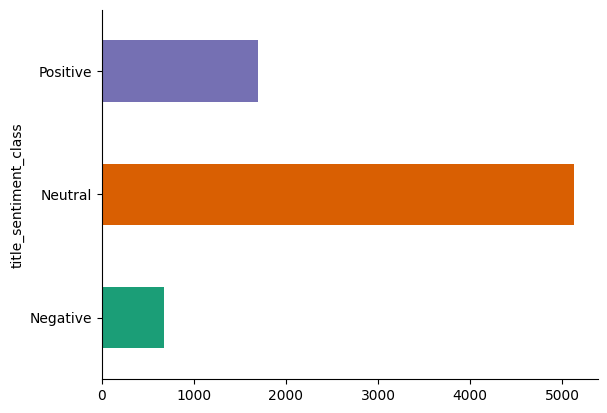

In [103]:
# Plotting to know the relationship between title_sentiment_class and its count
# Neutral Class has more count rather than all classes
model_df.groupby('title_sentiment_class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [104]:
model_df.columns    # Printing the columns of model_data

Index(['score', 'num_comments', 'upvote_ratio', 'title_sentiment_score',
       'content_sentiment_score', 'title_sentiment_class',
       'content_sentiment_class', 'Close_AAPL', 'High_AAPL', 'Low_AAPL',
       'Open_AAPL', 'Price_Change', 'Prev_Price_Change', 'stock_direction',
       'date'],
      dtype='object')

### **Explanation**

- **Text Cleaning**:
  - The text cleaning function removes unwanted elements from the post content (such as URLs, mentions, and special characters). This step helps to standardize the text data, making it ready for analysis.
  
- **Sentiment Analysis**:
  - Sentiment analysis is performed on the title and content of each Reddit post to determine the overall sentiment (positive, negative, or neutral). This is done using the **TextBlob** library, which provides an easy way to calculate sentiment polarity.
  
- **Feature Engineering**:
  - Text-based features (e.g., word count, character count, average word length) are generated to quantify the textual data. Additionally, sentiment scores (positive, negative, neutral) are used to create numeric features that can be fed into machine learning models.
  
- **Final Data**:
  - The output is a **cleaned dataset** containing the original post data along with additional features, including sentiment scores and word counts. This preprocessed data will serve as the input for machine learning models.

---

With these instructions, you can run the data preprocessing code to clean and prepare your dataset for further analysis and model training.
